In [1]:
# for creating a responsive plot 
%matplotlib widget 
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def skip(x):
    if x==0:
        return False
    if x%2==0:
        return True
    else:
        return False

In [16]:
tV=pd.read_csv('benchmark_TitanV.csv',skiprows=skip,header=0,delimiter=r"\s+")
tV_c2=pd.read_csv('benchmark_collapse2_TitanV.csv',skiprows=skip,header=0,delimiter=r"\s+")
tV_c3=pd.read_csv('benchmark_collapse3_TitanV.csv',skiprows=skip,header=0,delimiter=r"\s+")
skylake_c2=pd.read_csv('benchmark_collapse2_gfortran.csv',skiprows=skip,header=0,delimiter=r"\s+")

In [14]:
tV_c2

,nx,ny,box_nx,box_ny,n_gc,n_iter,n_boxes,t_total,unknowns/ns
0,256,256,4,4,1,16384,4096,0.770859,1.392916
1,256,256,8,8,1,16384,1024,0.515717,2.082037
2,256,256,16,16,1,16384,256,0.494720,2.170403
3,256,256,32,32,1,16384,64,0.519095,2.068488
4,256,256,64,64,1,16384,16,0.736222,1.458448
5,256,256,128,128,1,16384,4,1.437445,0.746979
6,256,256,256,256,1,16384,1,3.797203,0.282772
7,512,512,4,4,1,4096,16384,0.525473,2.043382
8,512,512,8,8,1,4096,4096,0.241105,4.453420
9,512,512,16,16,1,4096,1024,0.179899,5.968581


In [5]:
x = log10(tV["nx"]*tV["ny"])
y = log10(tV["n_boxes"])
z = tV["unknowns/ns"]

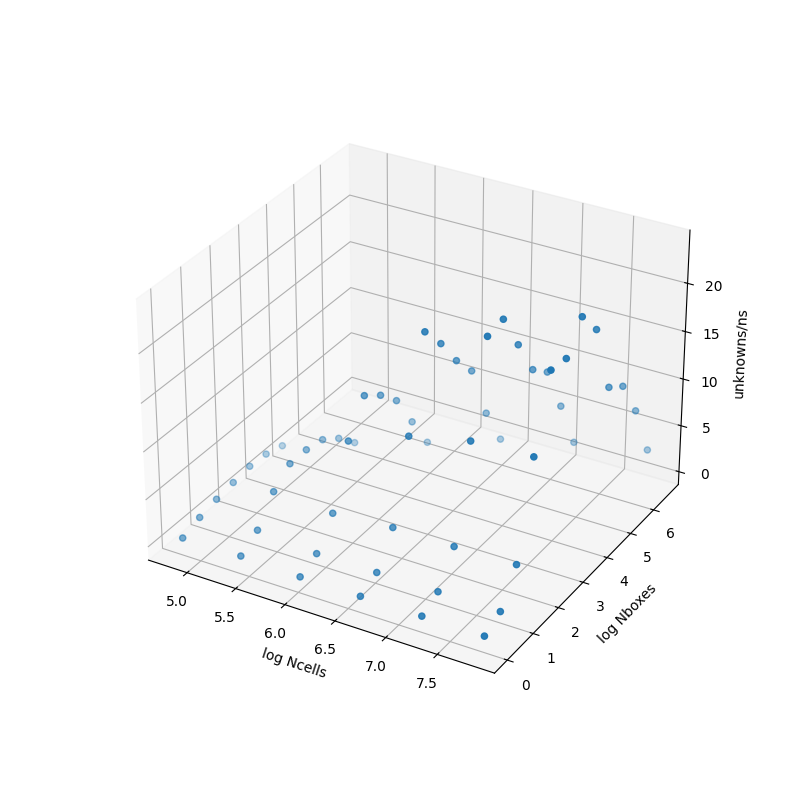

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z)  

ax.set_xlabel("log Ncells"); ax.set_ylabel("log Nboxes"); ax.set_zlabel("unknowns/ns")

plt.show()

Text(0.5, 1.0, 'No collapse')

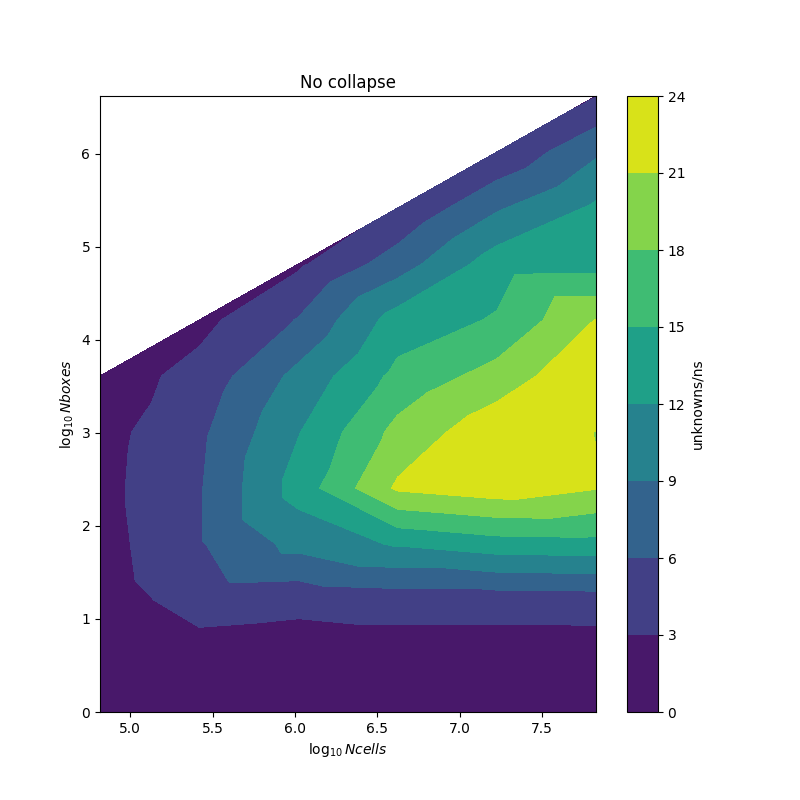

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
img=ax.tricontourf(x,y,z)
cbar=fig.colorbar(img)
ax.set_xlabel(r"$\log_{10} Ncells$"); ax.set_ylabel(r"$\log_{10} Nboxes$");cbar.set_label("unknowns/ns")
ax.set_title('No collapse')

Text(0.5, 1.0, 'collapse(2)')

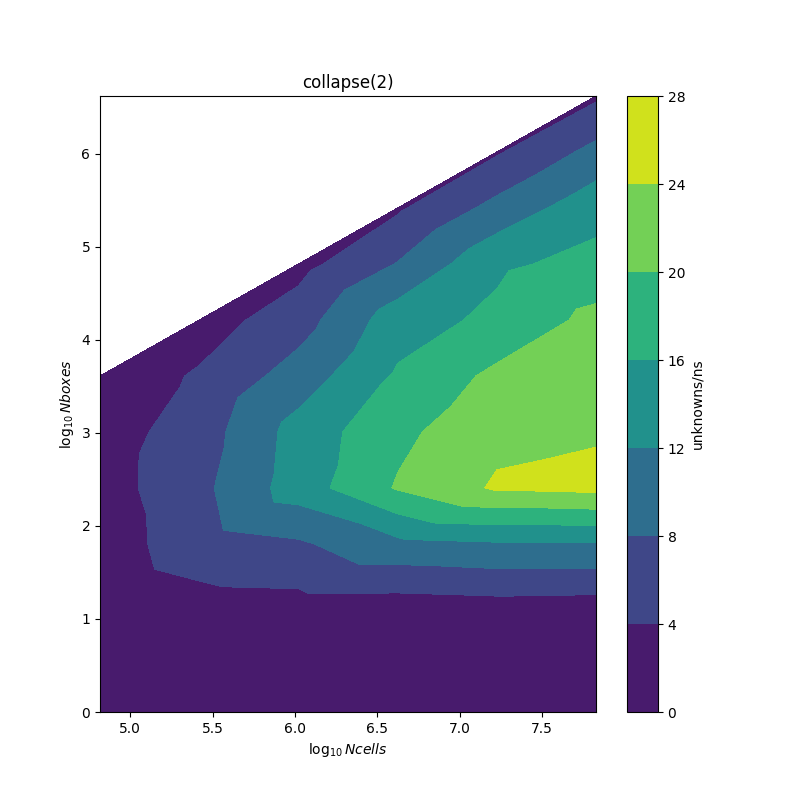

In [15]:
x = log10(tV_c2["nx"]*tV["ny"])
y = log10(tV_c2["n_boxes"])
z = tV_c2["unknowns/ns"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
img=ax.tricontourf(x,y,z)
cbar=fig.colorbar(img)
ax.set_xlabel(r"$\log_{10} Ncells$"); ax.set_ylabel(r"$\log_{10} Nboxes$");cbar.set_label("unknowns/ns")
ax.set_title('collapse(2)')

Text(0.5, 1.0, 'collapse(3)')

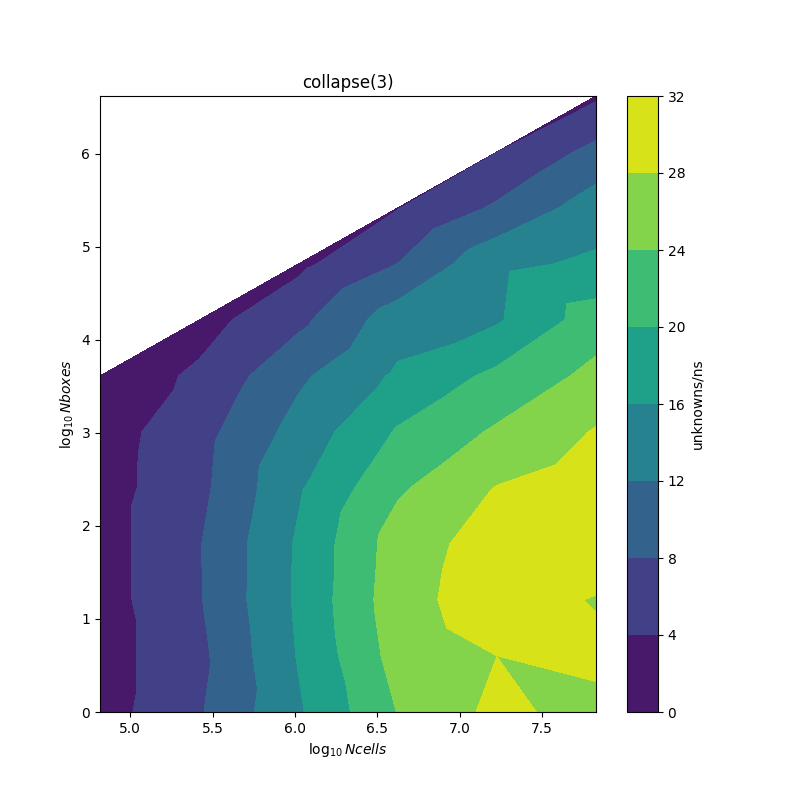

In [8]:
x = log10(tV_c3["nx"]*tV["ny"])
y = log10(tV_c3["n_boxes"])
z = tV_c3["unknowns/ns"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
img=ax.tricontourf(x,y,z)
cbar=fig.colorbar(img)
ax.set_xlabel(r"$\log_{10} Ncells$"); ax.set_ylabel(r"$\log_{10} Nboxes$");cbar.set_label("unknowns/ns")
ax.set_title('collapse(3)')

Text(0.5, 1.0, 'Skylake collapse(2)')

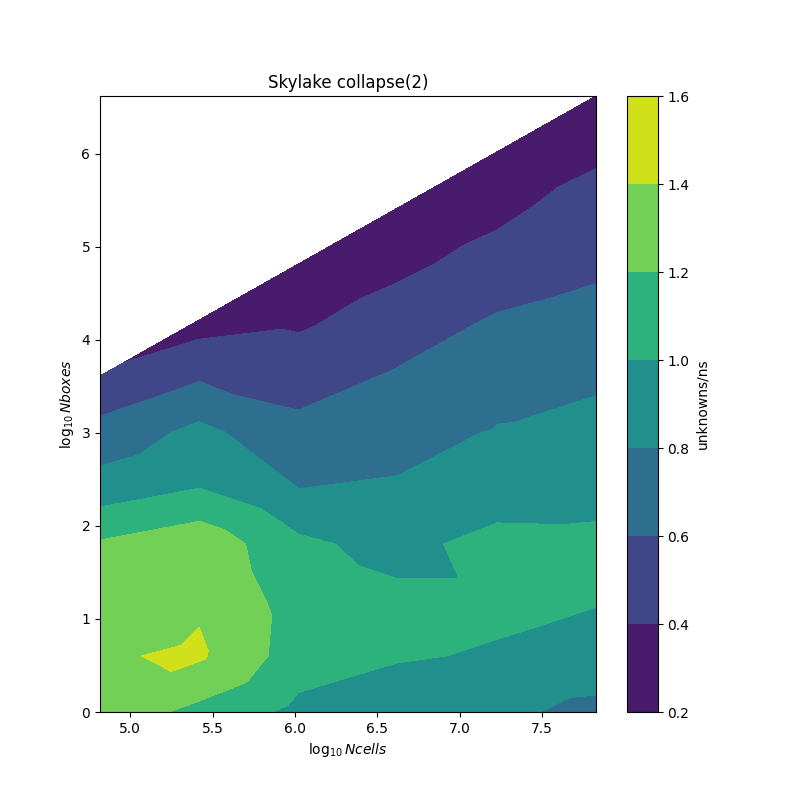

In [19]:
x = log10(skylake_c2["nx"]*tV["ny"])
y = log10(skylake_c2["n_boxes"])
z = skylake_c2["unknowns/ns"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
img=ax.tricontourf(x,y,z)
cbar=fig.colorbar(img)
ax.set_xlabel(r"$\log_{10} Ncells$"); ax.set_ylabel(r"$\log_{10} Nboxes$");cbar.set_label("unknowns/ns")
ax.set_title('Skylake')